In [10]:
include("table_reader.jl")
include("utils/utils.jl")
include("utils/periodicity.jl")
include("utils/Missing_values.jl")
include("utils/Estimation.jl")
include("utils/Simulation.jl")
include("utils/Trend.jl")
include("presentation/presutils.jl")
cd(@__DIR__)
series = extract_series("../mystations/TX_Montpellier.txt", type_data="TX")
series = truncate_MV(series)
x, date_vec = (series[!, 2], series.DATE)

([5.8, 9.6, 9.5, 7.6, 7.0, 10.8, 11.0, 9.0, 13.0, 13.3  …  12.8, 13.9, 13.0, 13.0, 15.1, 14.4, 15.8, 16.6, 15.9, 15.5], [Date("1946-01-01"), Date("1946-01-02"), Date("1946-01-03"), Date("1946-01-04"), Date("1946-01-05"), Date("1946-01-06"), Date("1946-01-07"), Date("1946-01-08"), Date("1946-01-09"), Date("1946-01-10")  …  Date("2025-02-19"), Date("2025-02-20"), Date("2025-02-21"), Date("2025-02-22"), Date("2025-02-23"), Date("2025-02-24"), Date("2025-02-25"), Date("2025-02-26"), Date("2025-02-27"), Date("2025-02-28")])

Polynomial Trend

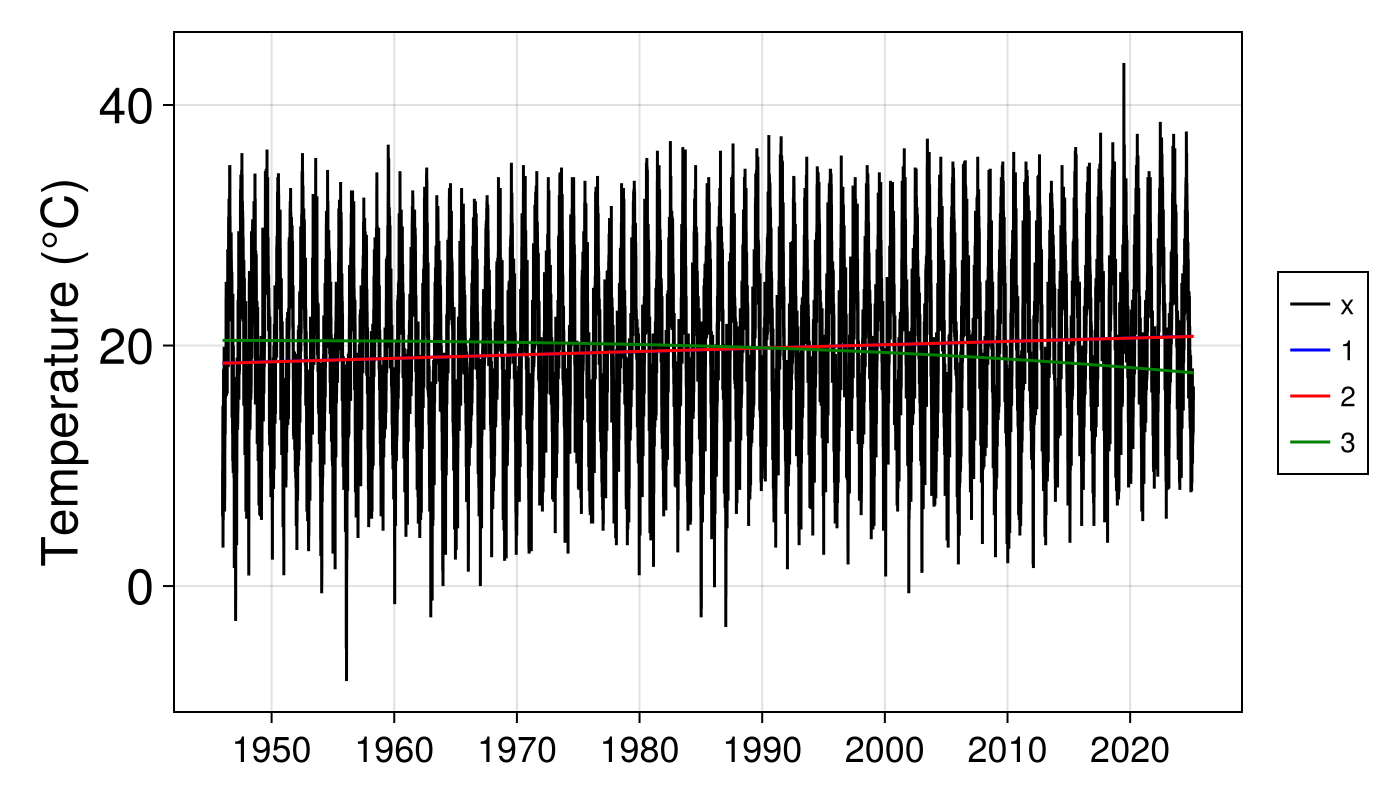

In [11]:
Poly1 = PolyTrendFunc(x, 1).(eachindex(x))
Poly2 = PolyTrendFunc(x, 2).(eachindex(x))
Poly3 = PolyTrendFunc(x, 3).(eachindex(x))
colors = ["black", "blue", "red", "green"]
PlotCurves([x, Poly1, Poly2, Poly3], date_vec, colors=colors, xtlfreq = "10year", labelvec = ["x","1","2","3"],size_=(700,400))

LOESS

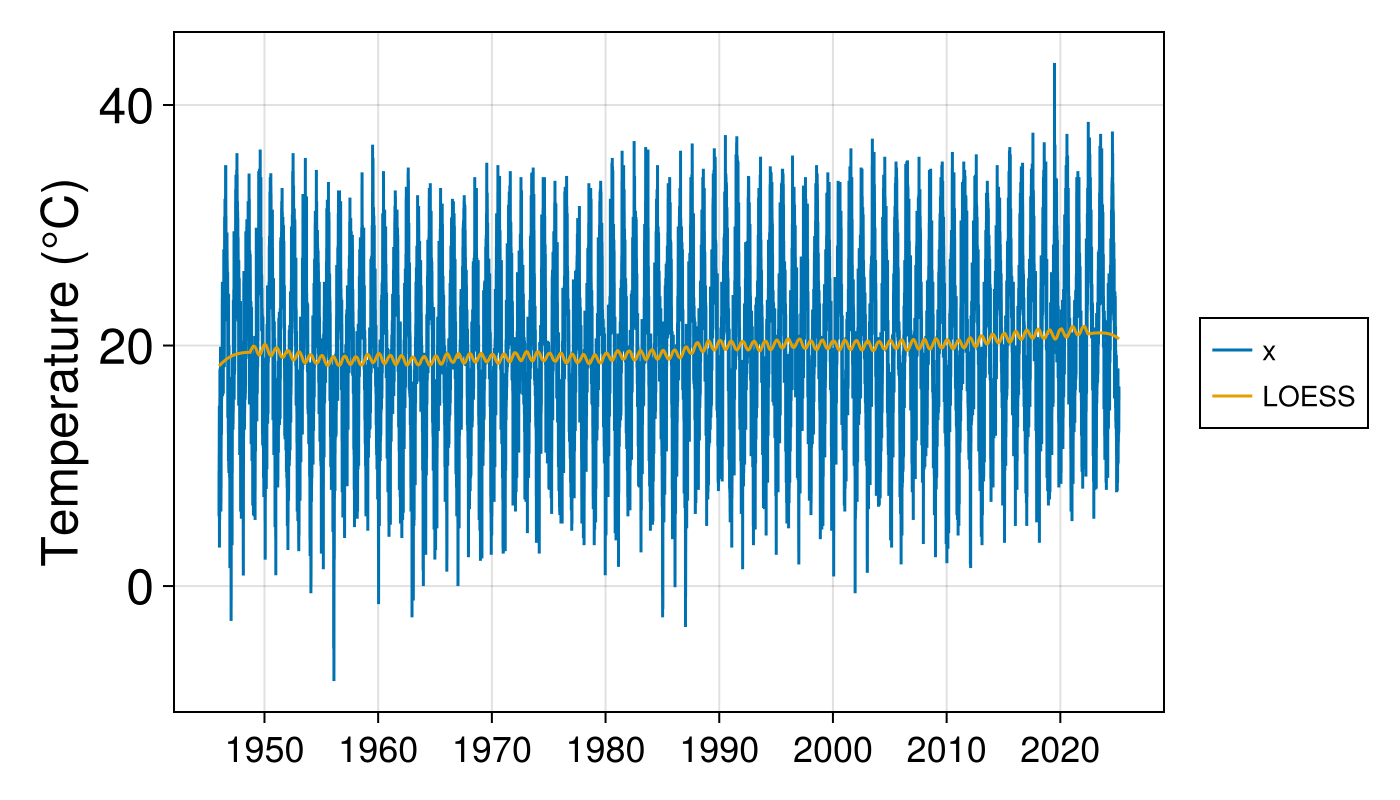

In [13]:
TrendLOESS = LOESS(x,2000,1)
PlotCurves([x, TrendLOESS], date_vec, xtlfreq = "10year", labelvec = ["x","LOESS"],size_=(700,400))